In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def explode_variable(series):
    series = series.dropna()
    series = series.str.split(';')
    series = series.explode()
    return series

In [3]:
df = pd.read_csv('survey_data_17_to_19.csv',low_memory=False)

In [4]:
is_freelance = df['Employment'].str.contains('freelance')
free_df = df[is_freelance]
free_df.head()

,Employment,Country,Education,Major,DeveloperType,JobSatisfaction,Salary,LanguageWorkedWith,DatabaseWorkedWith,PlatformWorkedWith,WebFrameWorkedWith,Year,logSalary
6,"Independent contractor, freelancer, or self-em...",France,Master's degree,Computer science or software engineering,Mobile developer; Desktop applications developer,Moderately dissatisfied,NaN,Objective-C; Swift,PostgreSQL,iOS; Amazon Web Services (AWS),NaN,2017,NaN
11,"Independent contractor, freelancer, or self-em...",United States,Primary/elementary school,NaN,Desktop applications developer,Moderately dissatisfied,NaN,JavaScript; VB.NET,NaN,Windows Desktop,NaN,2017,NaN
18,"Independent contractor, freelancer, or self-em...",Italy,Secondary school,NaN,Web developer,Moderately dissatisfied,NaN,PHP; SQL,MySQL,Windows Desktop; WordPress,NaN,2017,NaN
27,"Independent contractor, freelancer, or self-em...",Germany,Professional degree,Computer science or software engineering,NaN,NaN,NaN,C#; Java,NaN,Windows Desktop; Linux Desktop,NaN,2017,NaN
28,"Independent contractor, freelancer, or self-em...",Brazil,Some college/university study without earning ...,Computer science or software engineering,Web developer,Neither satisfied nor dissatisfied,NaN,JavaScript,MongoDB,NaN,Node.js; React; Firebase,2017,NaN


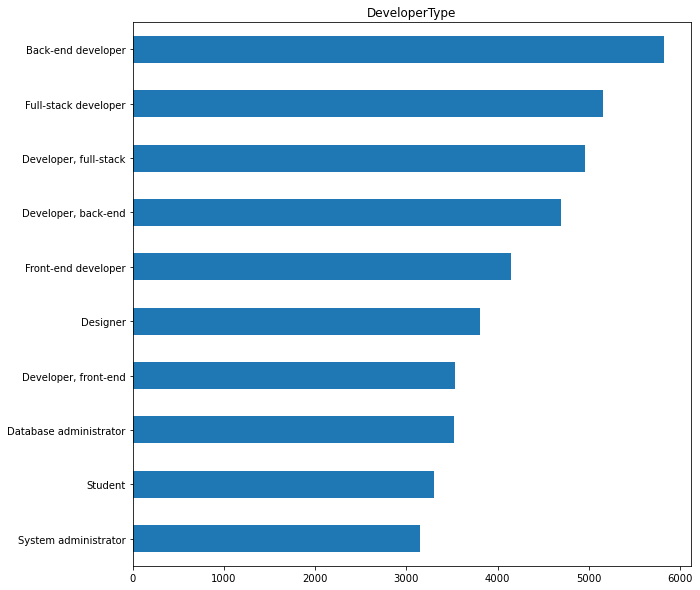

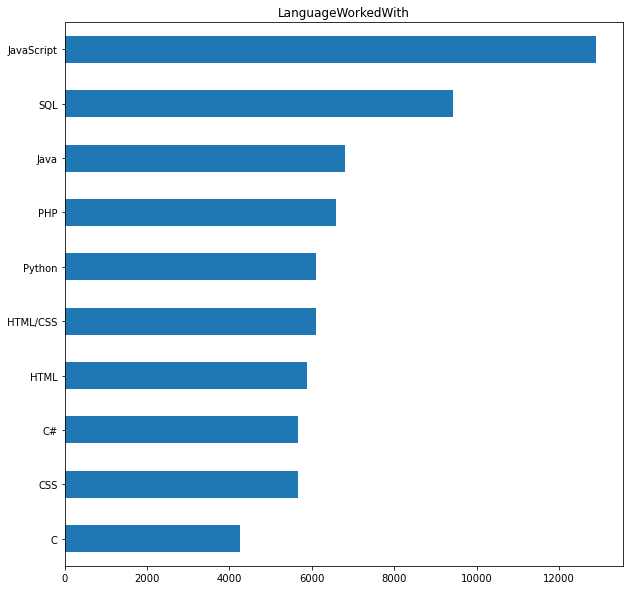

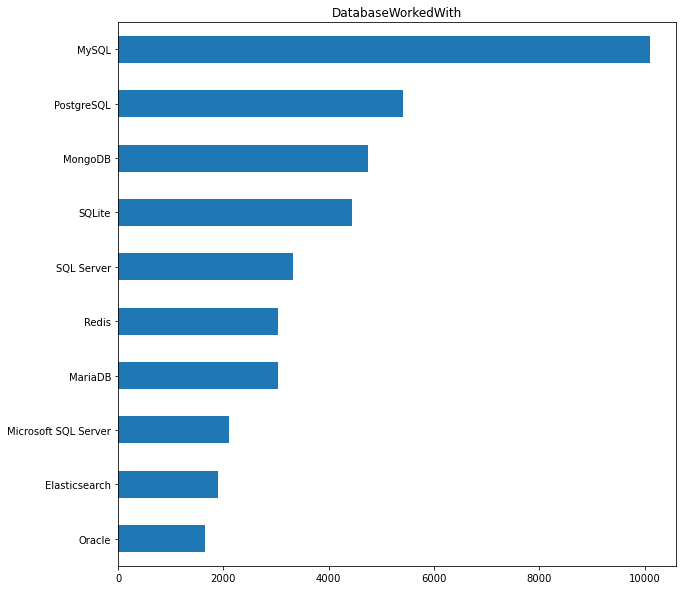

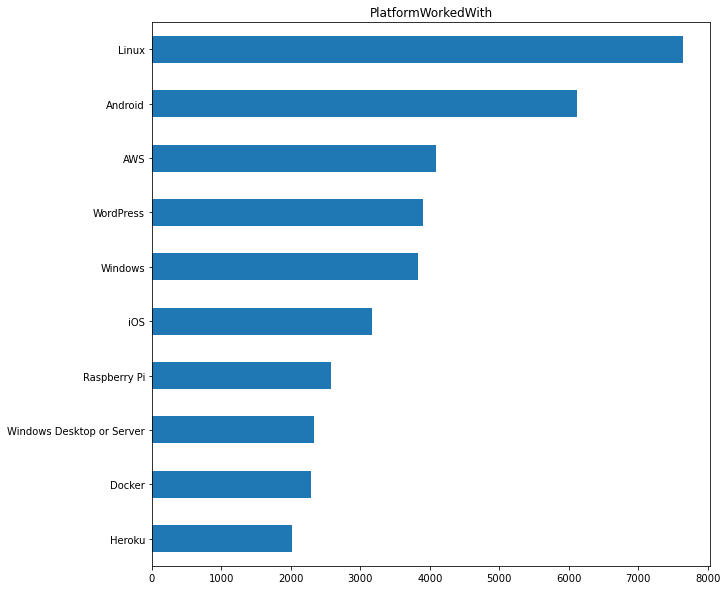

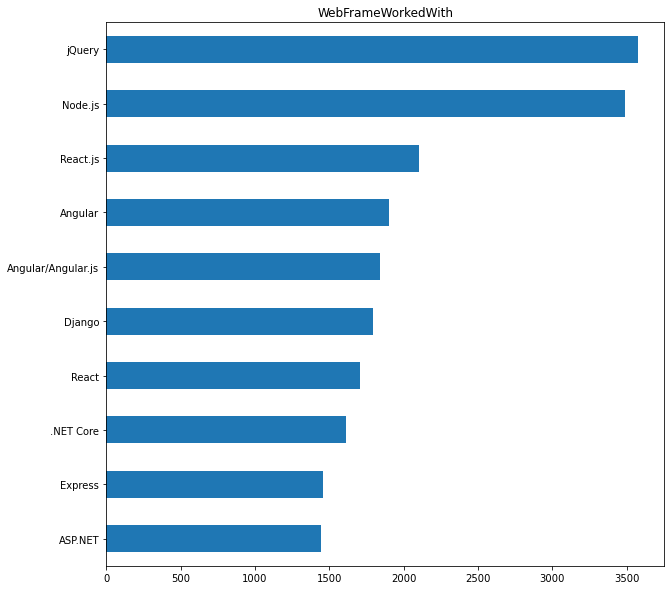

In [7]:
for col in ['DeveloperType','LanguageWorkedWith','DatabaseWorkedWith','PlatformWorkedWith','WebFrameWorkedWith']:
    plt.figure(figsize=(10,10))
    series = explode_variable(free_df[col])
    series.value_counts().head(10).sort_values().plot(kind='barh')
    plt.title(col)
    plt.show()